## Chris Hinckley
CSC 346 Project 3

## Life Expectancy: Statistical Analysis on Factors Influencing Life Expectancy
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2010 to 2015 for all the countries. In a nutshell, this study will focus on mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

## Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we will consider a subset of the data from year 2010-2015 from 193 countries for further analysis. The filtered file (final dataset) consists of 11 columns and 1108 rows with several predicting variables which have been divided into broad categories such as Mortality factors, Economical factors, and Social factors.

## Life Expectancy: Statistical Analysis on Factors Influencing Life Expectancy
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2010 to 2015 for all the countries. In a nutshell, this study will focus on mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

## SQL Code follows:

## Results of SQL Queries

COUNT(DISTINCT Country) After data cleaning
142

List of countries with the highest and lowest AVG population
    India	1,355,283,333
    Palau	292

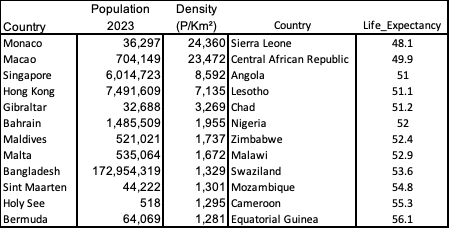

# DROP TABLE IF EXISTS mytable;


/* CREATE TABLE mytable(
   Country                VARCHAR(52) NOT NULL 
  ,Year                   INTEGER  NOT NULL
  ,Life_Expectancy        NUMERIC(4,1)
  ,Adult_Mortality        INTEGER 
  ,Alcohol                NUMERIC(5,2)
  ,Percentage_Expenditure NUMERIC(14,9) NOT NULL
  ,BMI                    NUMERIC(4,1)
  ,Total_Expenditure      NUMERIC(5,2)
  ,GDP                    NUMERIC(13,7)
  ,Population             NUMERIC(12,2)
  ,Schooling              NUMERIC(4,1)
); */

In [22]:
# import the needed libraries
# The sklearn library contains a lot of efficient tools for machine learning and
# statistical modeling including classification, regression, clustering and
# dimensionality reduction.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Import the life expectancy data into a dataframe (create the Jupyter notebook in Google Colab). Be sure to name the dataframe columns accordingly and sanitize the data as you did in SQL.

Answer the following questions by performing correlation analysis:
How does Adult mortality rates affect life expectancy?
Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?
What is the impact of schooling on the lifespan of humans?

Create and plot several linear regression models for life expectancy (as the dependent variable) and the independent variables that had the highest correlation with life expectancy as found in your correlation analysis.

Provide the equation of each model and compute their R2 and MSE values.

Summarize your findings and explain which model performs the best.


In [23]:

# Read the Sanitized data file into a DataFrame
# Read the CSV dataset
# Could not get data file from outside of the current directory
# ran into a URL issue
# So I put the data file in the current directory
# LRdata = pd.read_csv('https://github.com/ch720187/IDS/HW3/CleanedDatav2.csv')
LRdata = pd.read_csv('proj 3 final cut.csv')
# Show the top of the dataset to verify the contents
LRdata.head()


,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.68,16.7,9.20,553,"28,831,670",9.2
1,Afghanistan,2011,59.2,275,0.01,7.10,17.2,7.87,64,"29,785,990",9.5
2,Afghanistan,2012,59.5,272,0.01,78.18,17.6,8.52,670,"36,969,580",9.8
3,Afghanistan,2013,59.9,268,0.01,73.22,18.1,8.13,632,"31,731,688",9.9
4,Afghanistan,2014,59.9,271,0.01,73.52,18.6,8.18,613,"32,758,200",10.0


In [24]:
# Verify the size of the dataset

LRdata.shape

(240, 11)

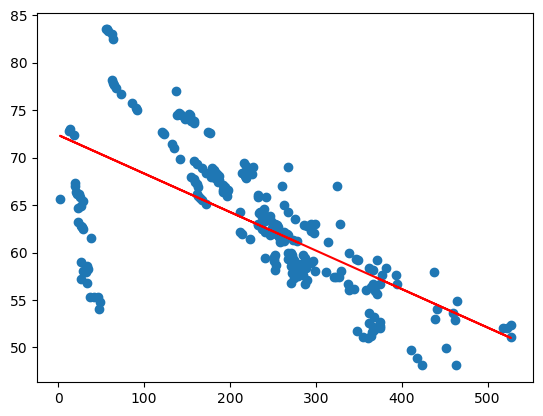

In [25]:
# Save the fourth column Adult Mortality (all the rows) in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 3].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)


# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()


In [26]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))
# Adult Mortality

The slope:  [[-0.04058008]]
The intercept:  [72.37984814]
MSE:  29.90330386158772
R2:  0.4404480959824063


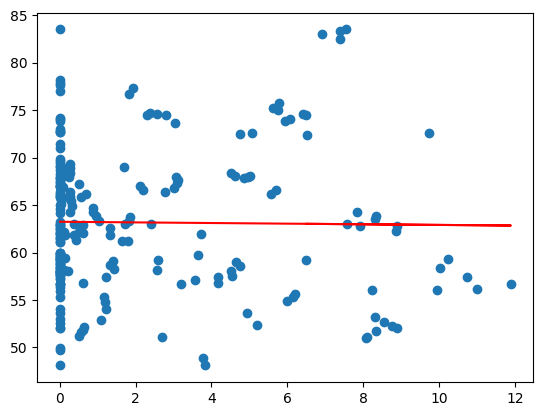

In [27]:
# Save the fifth column Alcohol in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 4].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)


# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [28]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))
# Adult Mortality

The slope:  [[-0.03329778]]
The intercept:  [63.24199519]
MSE:  53.43173306893367
R2:  0.00018311982954810624


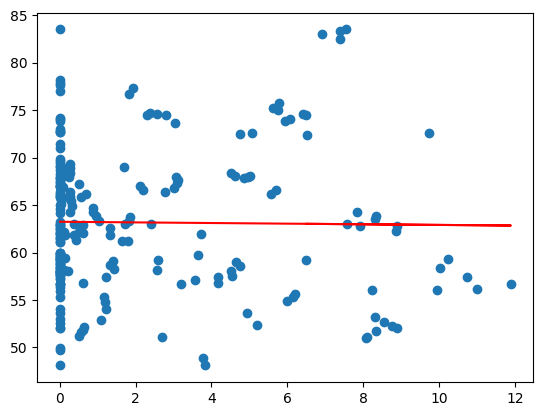

In [29]:
# Save the fifth column Alcohol in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 4].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)


# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [30]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))
# Alcohol

The slope:  [[-0.03329778]]
The intercept:  [63.24199519]
MSE:  53.43173306893367
R2:  0.00018311982954810624


In [31]:
# Save the sixth column Health Care % expenditure in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 5].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
# LRmodel.fit(X, Y)
# the data caused the regression model to fail so I decided the data was not 
# clean enough to rely upon

# Make predictions
# Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')

# plt.show()

In [32]:
# print("The slope: ", LRmodel.coef_)
# print("The intercept: ", LRmodel.intercept_)

# from sklearn.metrics import mean_squared_error, r2_score

# print("MSE: ", mean_squared_error(Y, Y_pred))
# print("R2: ", r2_score(Y, Y_pred))

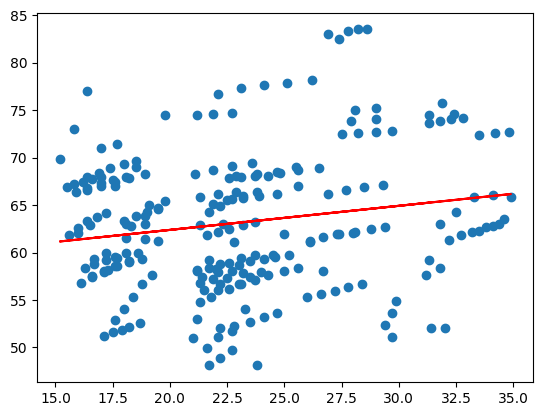

In [33]:
# Save the seventh column BMI in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 6].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)
# BMI data was cleaned to remove BMI for a country that was below 15 or above 40
# as theses values are clearly filled with errors

# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [34]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))
# BMI

The slope:  [[0.25357942]]
The intercept:  [57.31289557]
MSE:  51.754868752707914
R2:  0.03156067681342922


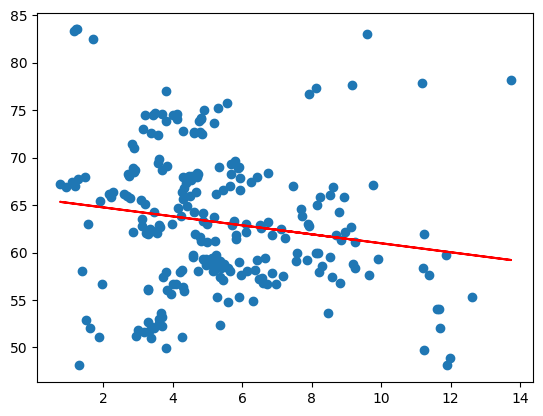

In [35]:
# Save the eigth column % Of Govt Spend on Health Care in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 7].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)


# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [36]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

The slope:  [[-0.47276086]]
The intercept:  [65.70140532]
MSE:  51.9949488048184
R2:  0.027068288584460642


In [37]:
# Save the ninth column GDP per Capita in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 8].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# GDP per capita was filled with errors
## the data caused the regression model to fail so I decided the data was not 
# clean enough to rely upon

# Perform linear regression
# LRmodel.fit(X, Y)


# Make predictions
# Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')

# plt.show()

In [38]:
# print("The slope: ", LRmodel.coef_)
# print("The intercept: ", LRmodel.intercept_)

# from sklearn.metrics import mean_squared_error, r2_score

# print("MSE: ", mean_squared_error(Y, Y_pred))
# print("R2: ", r2_score(Y, Y_pred))

In [39]:
# Save the tenth column Population in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 9].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
# LRmodel.fit(X, Y)


# Make predictions
# Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')

# plt.show()

In [40]:
# Save the tenth column Population in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 9].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# the data caused the regression model to fail so I decided the data was not 
# clean enough to rely upon

# Perform linear regression
# LRmodel.fit(X, Y)


# Make predictions
# Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')

# plt.show()

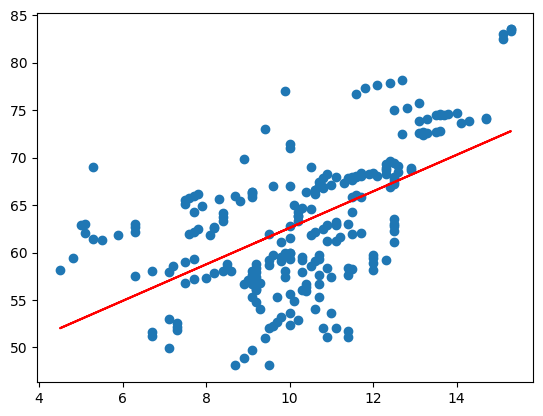

In [41]:
# Save the eleventh column Schooling in X and reshape as an np array
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = LRdata.iloc[:, 10].values.reshape(-1,1)

# Save the third column Life Expectancy (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)


# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [42]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))
# Schooling

The slope:  [[1.92283041]]
The intercept:  [43.37100029]
MSE:  35.83278215634611
R2:  0.3294954438935179


## Conclusion from the Python Analysis

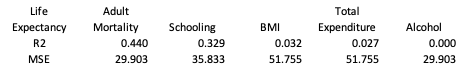

The only meaningful correlation test results for Life Expectancy were between Adult Mortality and Schooling. The correlation with Adult Mortality is not a variable that a government can control. The two measures are correlated but not causative. The correlation with Schooling is medium positive and seems intuitive in that greater schooling should be a positive factor for increased longevity.